# COVID-19 Data Exploratory Data Analysis (EDA)

## 1. Introduction

This project performs an Exploratory Data Analysis (EDA) on a publicly available COVID-19 dataset that tracks confirmed cases and deaths by county across the United States. The dataset includes daily counts of cases and deaths reported at the county level, along with associated geographic and temporal information.

The main goals of this analysis are to:

- Understand the structure and contents of the dataset
- Clean the data and handle any missing or inconsistent values
- Summarize key statistics (e.g., total cases, deaths, trends over time)
- Identify which counties or states were most affected
- Visualize trends and patterns over time and across regions
- Explore relationships between different features (e.g., cases vs. deaths)

This project will use Python libraries such as **Pandas** for data manipulation, **Matplotlib** and **Seaborn** for visualization, and basic statistical methods to uncover insights from the data.

## 2. Load and Inspect the Data

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the dataset
df = pd.read_csv("us-counties.csv")

# Display the first 5 rows of the dataset
df.head()


,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [3]:
print("Dataset shape:", df.shape)

Dataset shape: (2502832, 6)


In [4]:
print("Columns in dataset:")
print(df.columns.tolist())

Columns in dataset:
['date', 'county', 'state', 'fips', 'cases', 'deaths']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2502832 entries, 0 to 2502831
Data columns (total 6 columns):
 #   Column  Dtype  
---  ------  -----  
 0   date    object 
 1   county  object 
 2   state   object 
 3   fips    float64
 4   cases   int64  
 5   deaths  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 114.6+ MB


In [6]:
df.describe()

,fips,cases,deaths
count,2.479154e+06,2.502832e+06,2.445227e+06
mean,3.139958e+04,1.003380e+04,1.616100e+02
std,1.634251e+04,4.752522e+04,8.203335e+02
min,1.001000e+03,0.000000e+00,0.000000e+00
25%,1.902300e+04,3.820000e+02,6.000000e+00
50%,3.001100e+04,1.773000e+03,3.300000e+01
75%,4.611100e+04,5.884000e+03,1.010000e+02
max,7.803000e+04,2.908425e+06,4.026700e+04


In [7]:
df.isnull().sum()

date          0
county        0
state         0
fips      23678
cases         0
deaths    57605
dtype: int64

## 3. Data Cleaning

In [8]:
cleaned_df = df.dropna().drop_duplicates()


In [9]:
cleaned_df['date'] = cleaned_df['date'].astype('datetime64[us]')
cleaned_df['fips'] = cleaned_df['fips'].astype('Int64')
cleaned_df['deaths'] = cleaned_df['deaths'].astype('Int64')
cleaned_df['cases'] = cleaned_df['cases'].astype('Int64')

In [10]:
cleaned_df.info()

print(cleaned_df[['cases', 'deaths']].min())

<class 'pandas.core.frame.DataFrame'>
Index: 2421549 entries, 0 to 2502831
Data columns (total 6 columns):
 #   Column  Dtype         
---  ------  -----         
 0   date    datetime64[us]
 1   county  object        
 2   state   object        
 3   fips    Int64         
 4   cases   Int64         
 5   deaths  Int64         
dtypes: Int64(3), datetime64[us](1), object(2)
memory usage: 136.3+ MB
cases     1
deaths    0
dtype: Int64


## 4. Descriptive Statistics and Feature Summary

In [11]:
cleaned_df['cases'].describe()

count       2421549.0
mean      9962.526546
std      43708.673288
min               1.0
25%             388.0
50%            1814.0
75%            6017.0
max         2908425.0
Name: cases, dtype: Float64

Cases:
- Min: 1
- Max: 2,908,425
- Mean: ~9,962
- Total: 2,421,549

In [12]:
cleaned_df['deaths'].describe()

count     2421549.0
mean     152.166955
std      616.672633
min             0.0
25%             6.0
50%            33.0
75%           101.0
max         32022.0
Name: deaths, dtype: Float64

Deaths:
- Min: 0
- Max: 32,022
- Mean: ~152
- Total: 2,421,549

In [13]:
cleaned_df['county'].value_counts().head(10)

county
Washington    24215
Jefferson     20291
Franklin      19457
Jackson       18567
Lincoln       18529
Madison       15570
Montgomery    14081
Union         13972
Clay          13908
Marion        13212
Name: count, dtype: int64

In [14]:
cleaned_df['state'].value_counts().head(10)

state
Texas             193498
Georgia           124105
Virginia          103089
Kentucky           92530
Missouri           88089
Kansas             79048
Illinois           78835
North Carolina     77808
Iowa               76327
Tennessee          74008
Name: count, dtype: int64

In [15]:
top_counties = (
    cleaned_df.sort_values('date')
    .groupby(['state', 'county'], as_index=False)
    .last()
    .sort_values('cases', ascending=False)
    .head(10)
)
print(top_counties[['state', 'county', 'cases']]) # Top 10 unique counties for cases

           state          county    cases
202   California     Los Angeles  2908425
101      Arizona        Maricopa  1283590
360      Florida      Miami-Dade  1209302
608     Illinois            Cook  1193914
2619       Texas          Harris  1032781
220   California       San Diego   824586
216   California       Riverside   626695
323      Florida         Broward   614436
213   California          Orange   600384
219   California  San Bernardino   597377


In [16]:
top_deaths = (
    cleaned_df.sort_values('date')
    .groupby(['state', 'county'], as_index=False)
    .last()
    .sort_values('deaths', ascending=False)
    .head(10)
)
print(top_deaths[['state', 'county', 'deaths']]) # Top 10 unique counties for deaths

           state          county  deaths
202   California     Los Angeles   32022
101      Arizona        Maricopa   17326
608     Illinois            Cook   14936
2619       Texas          Harris   10972
360      Florida      Miami-Dade   10921
1747      Nevada           Clark    8458
1310    Michigan           Wayne    7975
219   California  San Bernardino    7423
213   California          Orange    7023
2575       Texas          Dallas    6772


## 4.1. Data Summary Report

Based on the analysis and outputs from the previous cells, here is a summary of the key findings from the COVID-19 dataset:

### Dataset Overview
- **Shape:** The dataset contains a 2502832 rows and 6 columns, representing daily COVID-19 case and death counts for US counties.
- **Columns:** The main columns include `date`, `county`, `state`, `fips`, `cases`, and `deaths`.

### Data Cleaning
- **Missing Values:** All rows with missing values were removed using `dropna()`.
- **Duplicates:** Duplicate rows were dropped to ensure data integrity.
- **Data Types:** Columns were converted to appropriate types:
  - `date` as datetime
  - `fips`, `cases`, and `deaths` as nullable integers (`Int64`)

### Descriptive Statistics
- **Cases:**
  - **Minimum:** 1
  - **Maximum:** 2,908,425
  - **Mean:** ~9,962
  - **Total Records:** 2,421,549
- **Deaths:**
  - **Minimum:** 0
  - **Maximum:** 32,022
  - **Mean:** ~152
  - **Total Records:** 2,421,549

### Most Affected Regions
- **Top Counties by Cases:** The top 10 counties with the highest number of cases were identified.
- **Top Counties by Deaths:** The top 10 counties with the highest number of deaths were also listed.

### County and State Distribution
- **Most Reported Counties:** The counties with the most records in the dataset were identified.
- **Most Reported States:** The states with the most records were also listed.

### Data Quality
- After cleaning, the dataset is free of missing and duplicate values, and all columns have appropriate data types for analysis.

## 5. Visualizations

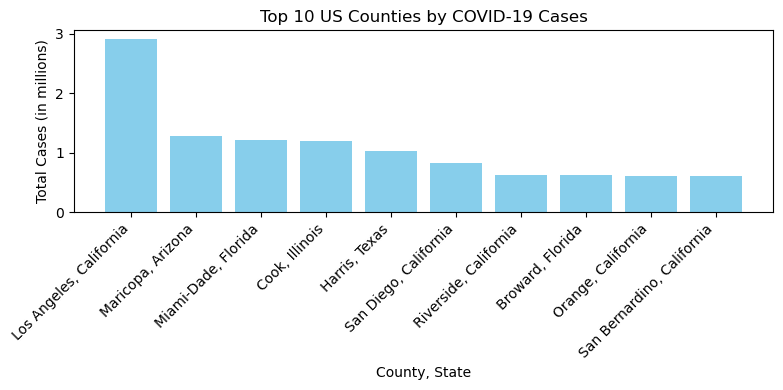

In [23]:
top_counties['label'] = top_counties['county'] + ', ' + top_counties['state']

plt.figure(figsize=(8, 4))
plt.bar(top_counties['label'], top_counties['cases'] / 1e6, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('County, State')
plt.ylabel('Total Cases (in millions)')
plt.title('Top 10 US Counties by COVID-19 Cases')
plt.tight_layout()
plt.show()

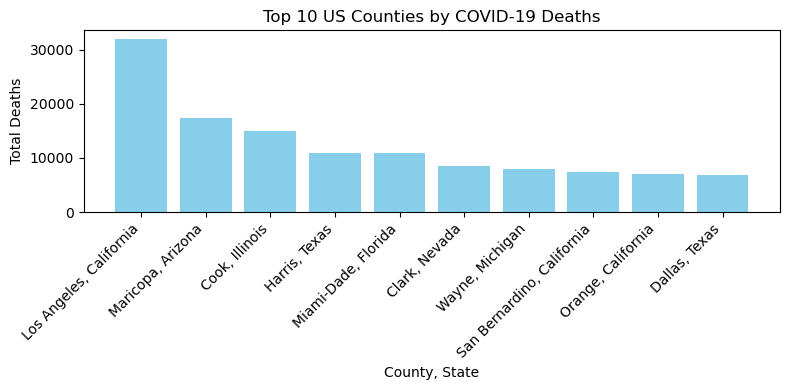

In [18]:
top_deaths['label'] = top_deaths['county'] + ', ' + top_deaths['state']


plt.figure(figsize=(8, 4))
plt.bar(top_deaths['label'], top_deaths['deaths'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('County, State')
plt.ylabel('Total Deaths')
plt.title('Top 10 US Counties by COVID-19 Deaths')
plt.tight_layout()
plt.show()

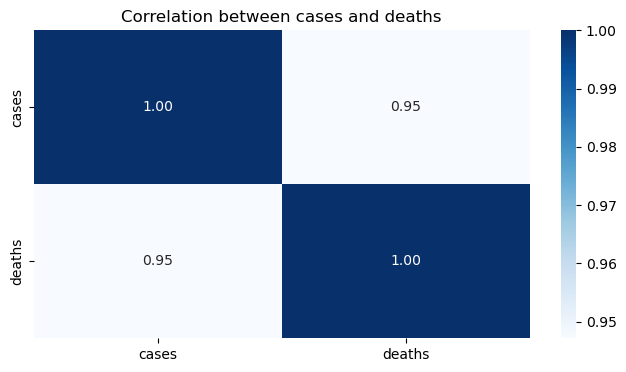

In [19]:
corr = cleaned_df[['cases', 'deaths']].corr()

plt.figure(figsize=(8, 4))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation between cases and deaths')
plt.show()

In [25]:
latest_date = cleaned_df['date'].max()
latest_df = cleaned_df[cleaned_df['date'] == latest_date].copy()
latest_df['fips'] = latest_df['fips'].astype(str).str.zfill(5)


fig = px.choropleth(
    latest_df,
    geojson="https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json",
    locations="fips",
    color="cases",
    color_continuous_scale="Reds",
    scope="usa",
    labels={"cases": "COVID-19 Cases"},
    title=f"COVID-19 Cases by County as of 7/10/2025"
)

fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
fig.show()

## 6. Final Summary and Insights

This exploratory data analysis (EDA) provided valuable insights into the spread and impact of COVID-19 across U.S. counties using a publicly available dataset.

### Key Findings:

- **Top Affected Counties:**
  - The counties with the highest cumulative case and death counts are concentrated in large urban areas such as Los Angeles, Cook (Chicago), and Maricopa (Phoenix).
  - These counties not only have high population densities but also serve as major travel and economic hubs.

- **Distribution Observations:**
  - Case and death counts are **heavily right-skewed**, meaning a small number of counties account for a disproportionately large number of total cases and deaths.
  - Most counties reported relatively low case numbers, while a few have extremely high counts.

- **Correlation Between Cases and Deaths:**
  - There is a **strong positive correlation** between confirmed cases and deaths, indicating that counties with more infections tend to report more fatalities — as expected in a cumulative dataset.

- **Temporal Trends:**
  - Over time, total U.S. cases and deaths have consistently risen (as seen in daily cumulative counts), underscoring the progressive nature of the pandemic's spread.

- **Geographic Patterns:**
  - A county-level choropleth map visually highlighted regions with high concentrations of cases, primarily in coastal and metropolitan areas.

### Data Notes:
- All date fields were cleaned and converted to proper datetime format.
- Missing values were handled by dropping rows with nulls in key columns.
- The analysis used the most recent report for each county to summarize final totals.
- FIPS codes were standardized for geographic visualizations.

### Visualizations Used:
- Bar charts to highlight top counties by cases and deaths
- Histograms and heatmaps to understand distribution and correlation
- A Plotly choropleth map to visualize geographic case spread

---

### Conclusion:

This project provided a clear, data-driven snapshot of how COVID-19 has affected U.S. counties. By combining data cleaning, descriptive statistics, and strong visualizations, we were able to uncover meaningful patterns, spot geographical disparities, and summarize the trajectory of the pandemic.

Further analysis could include:
- Normalizing case/death counts by population
- Examining temporal trends per state or region
- Modeling prediction trends using this cleaned dataset